# Comparison of ssha and ssvv along traces for the one-way linked and fully-coupled simulations

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from cmcrameri import cm

In [2]:
plt.rcParams["font.family"] = "sans-serif"
ps = 12
plt.rcParams.update({"font.size": ps})
plt.rcParams["font.family"] = "sans"
matplotlib.rc("xtick", labelsize=ps)
matplotlib.rc("ytick", labelsize=ps)

In [3]:
directory = "/import/freenas-m-04-students/fkutschera/simulations/traces/"
test = pd.read_csv(directory + "trace1_east_simple_oneway_ssha_120s.csv")
test

,Time,Bathymetry,WaterHeight,ssha,Depth,Plotter,Rank,Section,vtkValidPointMask,arc_length,Points:0,Points:1,Points:2
0,120,-2.6114,4.5769,-0.014859,22,6,0,20,1,0.0000,612800.0,7327000.0,0
1,120,-2.9666,4.7750,-0.015608,22,8,0,20,1,4.5894,612800.0,7327000.0,0
2,120,-3.3204,4.9677,-0.016242,22,8,0,20,1,8.7168,612800.0,7327000.0,0
3,120,-3.6894,5.1659,-0.016894,22,8,0,20,1,13.3060,612810.0,7327000.0,0
4,120,-4.0431,5.3586,-0.017528,22,8,0,20,1,17.4340,612810.0,7327000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,120,-55.4860,55.5280,0.041616,22,6,0,13,1,44009.0000,634990.0,7365000.0,0
9997,120,-55.4860,55.5280,0.041627,22,6,0,13,1,44013.0000,634990.0,7365000.0,0
9998,120,-55.4860,55.5280,0.041640,22,6,0,13,1,44018.0000,635000.0,7365000.0,0
9999,120,-55.4860,55.5280,0.041652,22,6,0,13,1,44022.0000,635000.0,7365000.0,0


In [42]:
def plot_ssha_fully(filename, ax):
    trace = pd.read_csv(directory + filename)
    length = np.sqrt((trace['Points:0'].iloc[0] - trace['Points:0'].iloc[-1])**2 + (trace['Points:1'].iloc[0] - trace['Points:1'].iloc[-1])**2)
    length = length/1000
    #print(length)
    distance = np.linspace(0,length,len(trace))
    #print(distance)
    ax.plot(distance, trace.u3, label="fully-coupled", color="dodgerblue")
    #ax.plot(distance, trace.u3, label="fully-coupled")

In [43]:
def plot_ssha_oneway(filename, ax):
    trace = pd.read_csv(directory + filename)
    length = np.sqrt((trace['Points:0'].iloc[0] - trace['Points:0'].iloc[-1])**2 + (trace['Points:1'].iloc[0] - trace['Points:1'].iloc[-1])**2)
    length = length/1000
    #print(length)
    distance = np.linspace(0,length,len(trace))
    #print(distance)
    #ax.plot(distance, trace.ssha, label="one-way", color="green", linestyle="--")
    ax.plot(distance, trace.ssha, label="one-way", color="black", linestyle="--")

In [44]:
def plot_ssvv(filename, trace_nr, ax):
    
    trace = pd.read_csv(directory + filename)
    length = np.sqrt((trace['Points:0'].iloc[0] - trace['Points:0'].iloc[-1])**2 + (trace['Points:1'].iloc[0] - trace['Points:1'].iloc[-1])**2)
    length = length/1000
    #print(length)
    distance = np.linspace(0,length,len(trace))
    #print(distance)
    ax.plot(distance, trace.v3, label="fully-coupled", color="dodgerblue")
    
    # fig inset
    if (trace_nr==1):
        x1, x2, y1, y2 = 18, 28, -0.1, 0.1
        left, bottom, width, height = 0.55, 0.04, 0.4, 0.4
    elif (trace_nr==2):
        x1, x2, y1, y2 = 2, 12, -0.1, 0.1
        left, bottom, width, height = 0.5, 0.08, 0.4, 0.4
    else:
        print("Sure?")
    axins = ax.inset_axes([left, bottom, width, height])
    axins.plot(distance, trace.v3, color="dodgerblue")
    #axins.plot(distance, trace.v3)
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticklabels([])
    axins.set_yticklabels([])
    ax.indicate_inset_zoom(axins, edgecolor="black")

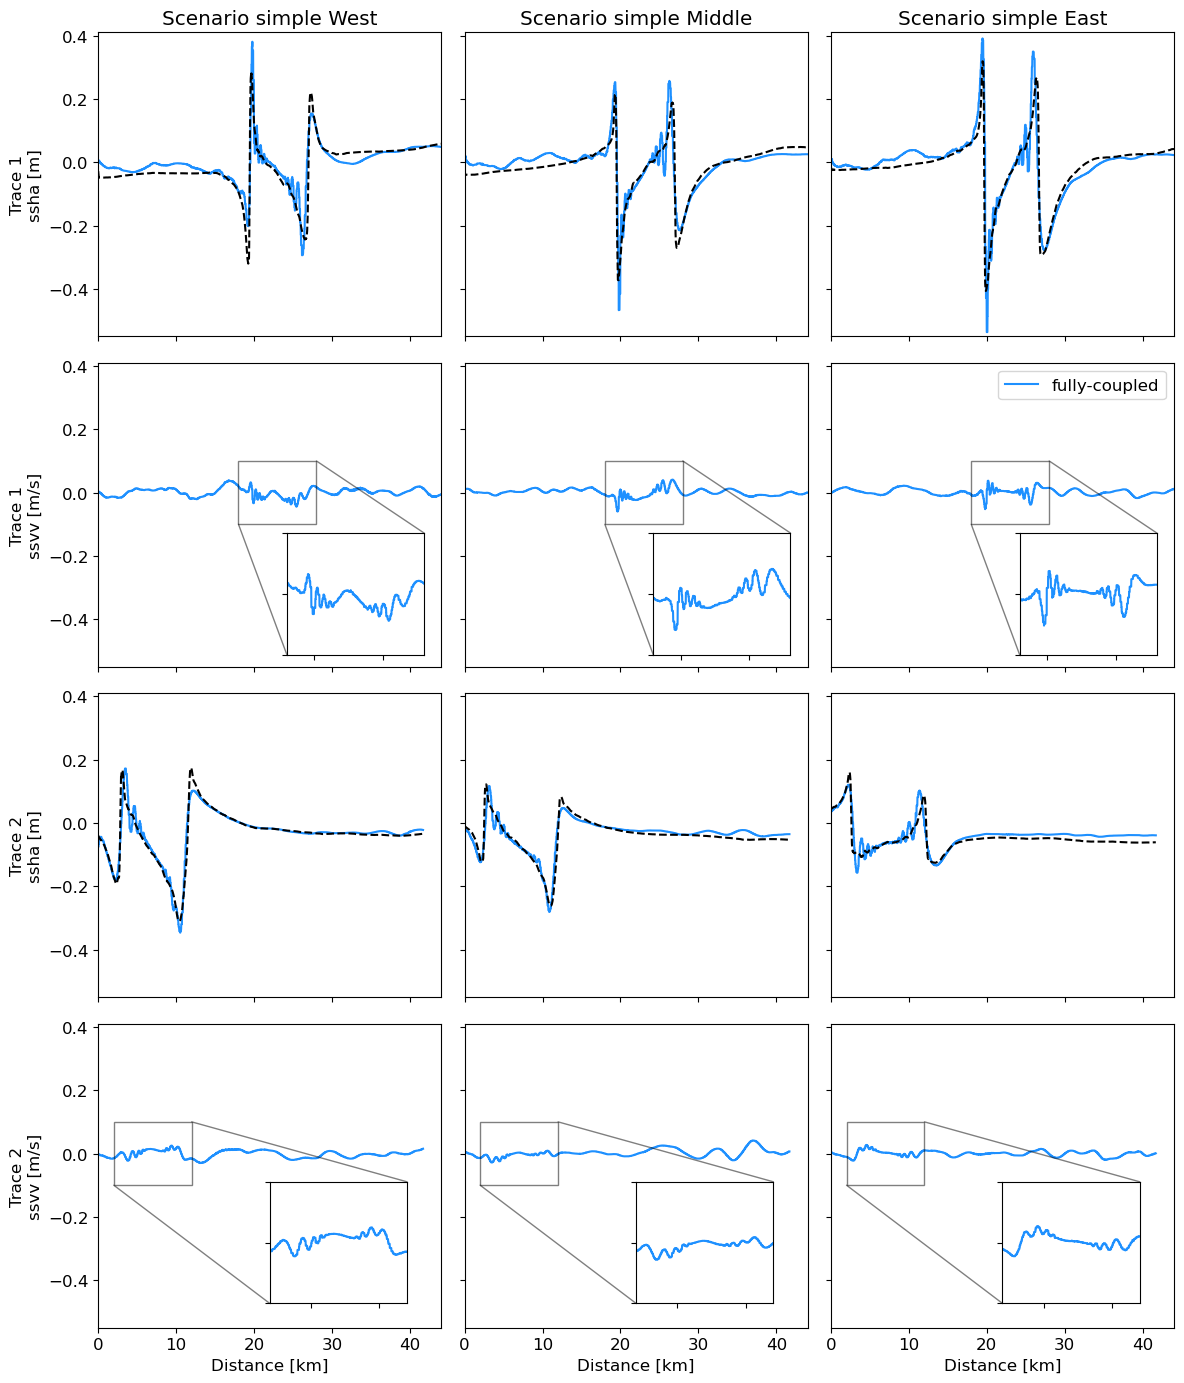

In [45]:
#  -fig 13: I would put row 1, row3 and then row 2 row4.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(12,14), 
                                                                                            sharex=True, sharey=True)

ax1.set_ylabel("Trace 1\nssha [m]")
ax1.set_title("Scenario simple West")
plot_ssha_fully("trace1_west_o5_ssha_ssvv_120s.csv", ax1)
plot_ssha_oneway("trace1_west_simple_oneway_ssha_120s.csv", ax1)

ax2.set_title("Scenario simple Middle")
plot_ssha_fully("trace1_middle_o5_ssha_ssvv_120s.csv", ax2)
plot_ssha_oneway("trace1_middle_simple_oneway_ssha_120s.csv", ax2)

ax3.set_title("Scenario simple East")
plot_ssha_fully("trace1_east_o5_ssha_ssvv_120s.csv", ax3)
plot_ssha_oneway("trace1_east_simple_oneway_ssha_120s.csv", ax3)

ax7.set_ylabel("Trace 2\nssha [m]")
plot_ssha_fully("trace2_west_o5_ssha_ssvv_120s.csv", ax7)#ax4)
plot_ssha_oneway("trace2_west_simple_oneway_ssha_120s.csv", ax7)#ax4)
plot_ssha_fully("trace2_middle_o5_ssha_ssvv_120s.csv", ax8)#ax5)
plot_ssha_oneway("trace2_middle_simple_oneway_ssha_120s.csv", ax8)#ax5)
plot_ssha_fully("trace2_east_o5_ssha_ssvv_120s.csv", ax9)#ax6)
plot_ssha_oneway("trace2_east_simple_oneway_ssha_120s.csv", ax9)#ax6)

ax4.set_ylabel("Trace 1\nssvv [m/s]")
plot_ssvv("trace1_west_o5_ssha_ssvv_120s.csv", 1, ax4)#ax7)
plot_ssvv("trace1_middle_o5_ssha_ssvv_120s.csv", 1, ax5)#ax8)
plot_ssvv("trace1_east_o5_ssha_ssvv_120s.csv", 1, ax6)#ax9)

ax10.set_ylabel("Trace 2\nssvv [m/s]")
plot_ssvv("trace2_west_o5_ssha_ssvv_120s.csv", 2, ax10)
plot_ssvv("trace2_middle_o5_ssha_ssvv_120s.csv", 2, ax11)
plot_ssvv("trace2_east_o5_ssha_ssvv_120s.csv", 2, ax12)
ax10.set_xlabel("Distance [km]")
ax11.set_xlabel("Distance [km]")
ax12.set_xlabel("Distance [km]")

ax1.set_ylim(-0.55, 0.41)
ax1.set_xlim(0,44.01)
ax6.legend(loc="upper right")

plt.tight_layout()
fig.savefig("ssha_ssvv_comparisonII.png", dpi=300)

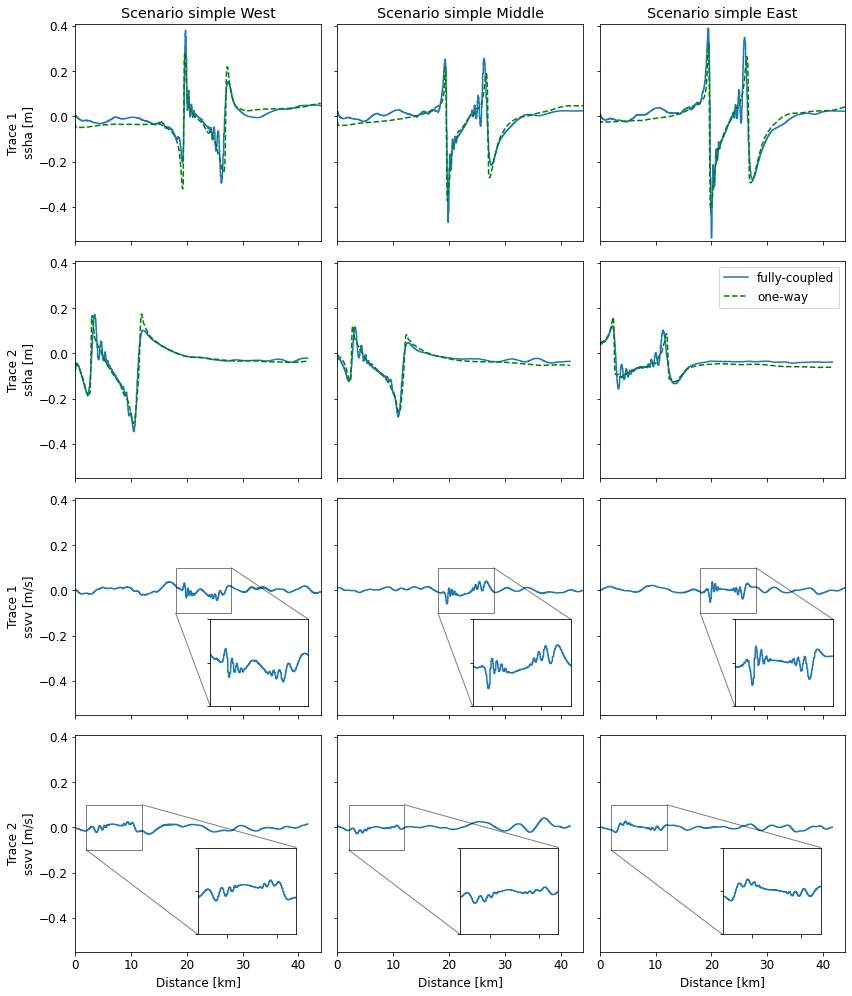

In [73]:
# original order
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(12,14), 
                                                                                            sharex=True, sharey=True)

ax1.set_ylabel("Trace 1\nssha [m]")
ax1.set_title("Scenario simple West")
plot_ssha_fully("trace1_west_o5_ssha_ssvv_120s.csv", ax1)
plot_ssha_oneway("trace1_west_simple_oneway_ssha_120s.csv", ax1)

ax2.set_title("Scenario simple Middle")
plot_ssha_fully("trace1_middle_o5_ssha_ssvv_120s.csv", ax2)
plot_ssha_oneway("trace1_middle_simple_oneway_ssha_120s.csv", ax2)

ax3.set_title("Scenario simple East")
plot_ssha_fully("trace1_east_o5_ssha_ssvv_120s.csv", ax3)
plot_ssha_oneway("trace1_east_simple_oneway_ssha_120s.csv", ax3)

ax4.set_ylabel("Trace 2\nssha [m]")
plot_ssha_fully("trace2_west_o5_ssha_ssvv_120s.csv", ax4)
plot_ssha_oneway("trace2_west_simple_oneway_ssha_120s.csv", ax4)
plot_ssha_fully("trace2_middle_o5_ssha_ssvv_120s.csv", ax5)
plot_ssha_oneway("trace2_middle_simple_oneway_ssha_120s.csv", ax5)
plot_ssha_fully("trace2_east_o5_ssha_ssvv_120s.csv", ax6)
plot_ssha_oneway("trace2_east_simple_oneway_ssha_120s.csv", ax6)

ax7.set_ylabel("Trace 1\nssvv [m/s]")
plot_ssvv("trace1_west_o5_ssha_ssvv_120s.csv", 1, ax7)
plot_ssvv("trace1_middle_o5_ssha_ssvv_120s.csv", 1, ax8)
plot_ssvv("trace1_east_o5_ssha_ssvv_120s.csv", 1, ax9)

ax10.set_ylabel("Trace 2\nssvv [m/s]")
plot_ssvv("trace2_west_o5_ssha_ssvv_120s.csv", 2, ax10)
plot_ssvv("trace2_middle_o5_ssha_ssvv_120s.csv", 2, ax11)
plot_ssvv("trace2_east_o5_ssha_ssvv_120s.csv", 2, ax12)
ax10.set_xlabel("Distance [km]")
ax11.set_xlabel("Distance [km]")
ax12.set_xlabel("Distance [km]")

ax1.set_ylim(-0.55, 0.41)
ax1.set_xlim(0,44.01)
ax6.legend(loc="upper right")

plt.tight_layout()
fig.savefig("ssha_ssvv_comparison.png", dpi=300)

## Test figure inset

(<matplotlib.patches.Rectangle at 0x7f471ed4df40>,
 (<matplotlib.patches.ConnectionPatch at 0x7f471edef520>,
  <matplotlib.patches.ConnectionPatch at 0x7f471edef130>))

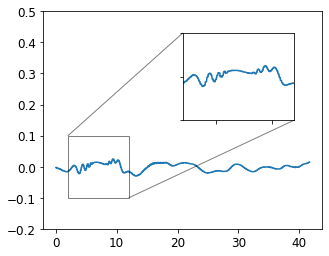

In [74]:
trace = pd.read_csv(directory + "trace2_west_o5_ssha_ssvv_120s.csv")
length = np.sqrt((trace['Points:0'].iloc[0] - trace['Points:0'].iloc[-1])**2 + (trace['Points:1'].iloc[0] - trace['Points:1'].iloc[-1])**2)
length = length/1000
#print(length)
distance = np.linspace(0,length,len(trace))
#print(distance)

fig, ax = plt.subplots(figsize=[5,4])
ax.plot(distance, trace.v3, label="fully-coupled")
ax.set_ylim(-0.2,0.5)

axins = ax.inset_axes([0.5,0.5,0.4,0.4])
x1, x2, y1, y2 = 2, 12, -0.1, 0.1
axins.plot(distance, trace.v3)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])

ax.indicate_inset_zoom(axins, edgecolor="black")